In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
i=load_iris()
dir(i)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df=pd.DataFrame(i.data,columns=i.feature_names)

In [7]:
df['target']=i.target

In [12]:
df1=df.drop(['sepal length (cm)', 'sepal width (cm)'],axis=1)

In [17]:
df1.head(2)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0


In [14]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Petal Width')

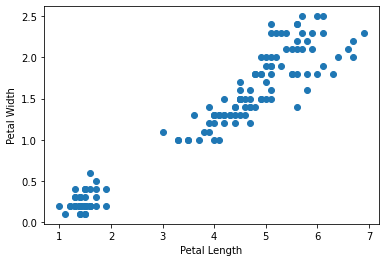

In [19]:
plt.scatter(x=df1['petal length (cm)'],y=df1['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()
sdata=scaler.fit_transform(df1.iloc[:,:2])

In [25]:
sse=[]
k_value=range(1,11)
for x in k_value:
    km=KMeans(n_clusters=x)
    km.fit(sdata)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Errors')

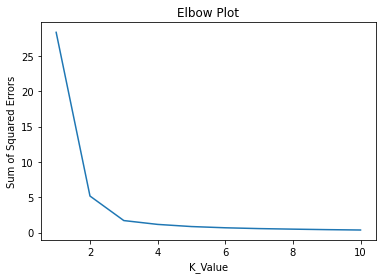

In [29]:
plt.plot(k_value,sse)
plt.title('Elbow Plot')
plt.xlabel('K_Value')
plt.ylabel('Sum of Squared Errors')

### If K=2

In [39]:
km=KMeans(n_clusters=2)
km.fit(sdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
pred_values=km.predict(sdata)
pred_values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

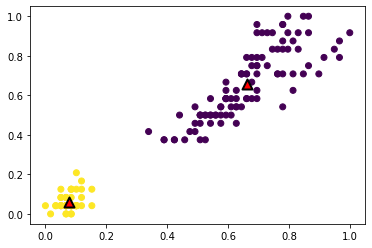

In [37]:
plt.scatter(sdata[:,0],sdata[:,1],c=pred_values)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',linewidths=2,edgecolors='k',c='r',s=100,label='centroid')

### If K=3

In [40]:
km3=KMeans(n_clusters=3)
km3.fit(sdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
pred_values3=km3.predict(sdata)
pred_values3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

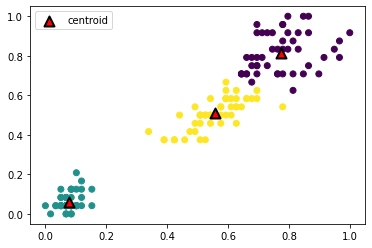

In [91]:
plt.scatter(sdata[:,0],sdata[:,1],c=pred_values3)
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1],marker='^',linewidths=2,edgecolors='k',c='r',s=100,label='centroid')
plt.legend()

In [44]:
df1['pred_target']=pred_values3

In [52]:
df1['target_names']=[i.target_names[j] for j in i.target]
df1['target']=i.target
df1

,petal length (cm),petal width (cm),target,pred_target,target_names
0,1.4,0.2,0,1,setosa
1,1.4,0.2,0,1,setosa
2,1.3,0.2,0,1,setosa
3,1.5,0.2,0,1,setosa
4,1.4,0.2,0,1,setosa
...,...,...,...,...,...
145,5.2,2.3,2,0,virginica
146,5.0,1.9,2,0,virginica
147,5.2,2.0,2,0,virginica
148,5.4,2.3,2,0,virginica


In [53]:
df1['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [50]:
df1['pred_target'].value_counts()

2    52
1    50
0    48
Name: pred_target, dtype: int64

In [56]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy = 100-(accuracy_score(df1['target'],df1['pred_target'])*100).round()
accuracy

97.0

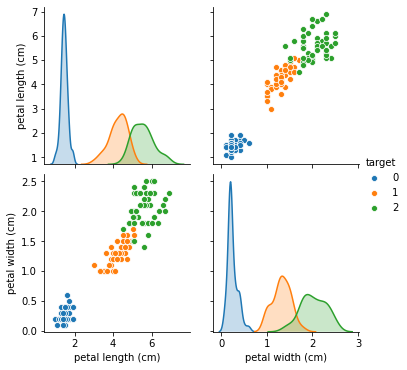

In [94]:
sns.pairplot(data=df1.iloc[:,:3],hue='target')

## Summary

 - In iris dataset we pick only two columns (petal length and petal width)
 - I find out best value for K by doing "elbow plot"
 - Build a model using KMeans Clustering Algorithm 
 - Observed Predicted values
 - Accuracy b/w original label and predicted label is 97%